<a href="https://colab.research.google.com/github/ishitadatta/S-P-stock-analysis/blob/master/StockS%26PArima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#essential libraries
import pandas as pd                   #pandas does things with matrixes
import numpy as np                    #used for sorting a matrix
import matplotlib.pyplot as plt       #matplotlib is used for plotting data
import matplotlib.ticker as ticker    #used for changing tick spacing
import datetime as dt                 #used for dates
import matplotlib.dates as mdates     #used for dates, in a different way
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [18]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5MB 2.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#importing dataset
df1 = pd.read_csv(r"all_stocks_5yr.csv")
df1.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df = df1[df1['Name'] == 'AAL'] 
df.size

8813

In [4]:
df.drop(columns=["open", "high", "low", "volume", "Name"], inplace=True)
df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99
...,...,...
1254,2018-02-01,53.88
1255,2018-02-02,52.10
1256,2018-02-05,49.76
1257,2018-02-06,51.18


In [5]:
df.set_index('date', inplace=True)
df

,close
date,
2013-02-08,14.75
2013-02-11,14.46
2013-02-12,14.27
2013-02-13,14.66
2013-02-14,13.99
...,...
2018-02-01,53.88
2018-02-02,52.10
2018-02-05,49.76


In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df = df.resample('D').ffill()
df

,close
date,
2013-02-08,14.75
2013-02-09,14.75
2013-02-10,14.75
2013-02-11,14.46
2013-02-12,14.27
...,...
2018-02-03,52.10
2018-02-04,52.10
2018-02-05,49.76


In [8]:
df.index[0]

Timestamp('2013-02-08 00:00:00', freq='D')

# Understanding the Dataset

The first step towards data analysis is to understand the data in hand. Its columns, max, min, count, null values

In [9]:
df.columns                    #prints just the columns of the matrix

Index(['close'], dtype='object')

In [10]:
df.info()                            #get information of each column

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-02-08 to 2018-02-07
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [11]:
df.describe()                        #describe the dataset

,close
count,1826.000000
mean,38.416239
std,10.979374
min,13.020000
25%,34.360000
50%,40.870000
75%,46.687500
max,58.470000


# Missing values

In this section we will handle all the missing data in the dataset

In [12]:
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrixies
missing_data  

,Total,Percent
close,0,0.0


We observe that the total number of column with missing values are 0 after we do a forward fill.

In [13]:
X = df.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]

# Plotting the Data

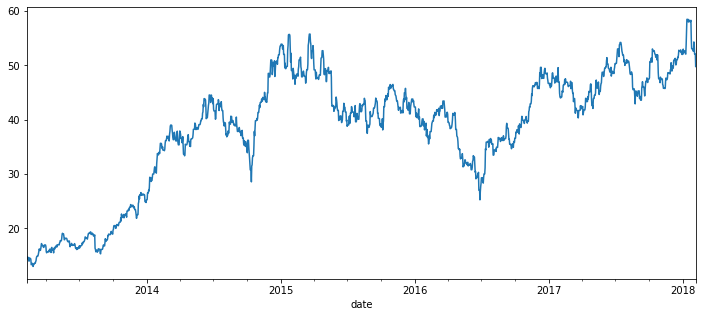

In [14]:
df['close'].plot(figsize=(12,5))

In [ ]:
#!pip install pmdarima

In [15]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

##### Figuring out Order for Arima model

In [ ]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(df['close'], trace=True,
# suppress_warnings=True)
# stepwise_fit.summary()

#### Split Data into Training and Testing

In [16]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1826, 1)
(1796, 1) (30, 1)


#### Training the model

In [34]:
from statsmodels.tsa.arima.model import ARIMA
# best_score, best_order = float("inf"), None
# p_values = range(2,10)
# d_values = range(0,3)
# q_values = range(0,3)
# for p in p_values:
#     for d in d_values:
#         for q in q_values:
#             order = (p,d,q)
#             try:
history = train
predictions = pd.DataFrame(columns=['close_price'])
for i in range(0,len(test)):
    model = ARIMA(history, order=(5,1,0), enforce_invertibility=False, enforce_stationarity=False).fit()
    df10 = pd.DataFrame({'close_price': model.forecast()}, index=model.forecast().index)
    predictions = predictions.append(df10)
    history = history.append(test[i: i + 1])
    print('Predicted=%f, Expected=%f' % (df10.iloc[0,0], test.iloc[i:i+1,0]))
rmse = np.sqrt(mean_squared_error(test, predictions))
            # if rmse < best_score:
            #     best_score, best_order = rmse, order
            # print('ARIMA:%s RMSE=%f' % (order,rmse))
#             except:
#                 print('a')
#                 continue
print('Best ARIMA:%s RMSE=%f' % (best_order, best_score))

Predicted=52.111357, Expected=52.080000
Predicted=52.068568, Expected=53.780000
Predicted=53.770149, Expected=56.420000
Predicted=56.499534, Expected=58.470000
Predicted=58.698582, Expected=58.470000
Predicted=58.667724, Expected=58.470000
Predicted=58.518973, Expected=58.470000
Predicted=58.371010, Expected=57.980000
Predicted=57.892006, Expected=58.160000
Predicted=58.152578, Expected=58.340000
Predicted=58.321092, Expected=58.060000
Predicted=58.069023, Expected=58.060000
Predicted=58.081075, Expected=58.060000
Predicted=58.037317, Expected=58.100000
Predicted=58.094978, Expected=58.290000
Predicted=58.305588, Expected=54.790000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Predicted=54.718737, Expected=53.050000
Predicted=52.931060, Expected=53.070000
Predicted=52.835217, Expected=53.070000
Predicted=52.977831, Expected=53.070000
Predicted=53.200581, Expected=52.680000
Predicted=52.727263, Expected=52.590000
Predicted=52.578318, Expected=54.320000
Predicted=54.345747, Expected=53.880000
Predicted=53.900194, Expected=52.100000
Predicted=52.149992, Expected=52.100000
Predicted=52.045163, Expected=52.100000
Predicted=51.945732, Expected=49.760000
Predicted=49.710535, Expected=51.180000
Predicted=51.240783, Expected=51.400000
Best ARIMA:None RMSE=inf


In [35]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['close'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 1796
Model:                     ARMA(1, 5)   Log Likelihood               -1927.042
Method:                       css-mle   S.D. of innovations              0.706
Date:                Sun, 01 Nov 2020   AIC                           3870.085
Time:                        12:42:47   BIC                           3914.031
Sample:                    02-08-2013   HQIC                          3886.309
                         - 01-08-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.1673      8.823      4.099      0.000      18.875      53.459
ar.L1.close     0.9985      0.001    754.020      0.000       0.996       1.001
ma.L1.close     0.0144      0.024      0.607      0.544      -0.032       0.061
ma.L2.close     0.0229      0.024      0.970      0.332      -0.023       0.069
ma.L3.close     0.0596      0.023      2.550      0.011       0.014       0.105
ma.L4.close     0.0024      0.024      0.100      0.920      -0.044       0.049
ma.L5.close    -0.0336      0.024     -1.412      0.158      -0.080       0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           -1.7088           -1.0654j            2.0137           -0.4113
MA.2           -1.7088           +1.0654j            2.0137            0.4113
MA.3            0.6265           -1.7018j            1.8135           -0.1939
MA.4            0.6265           +1.7018j            1.8135            0.1939
MA.5            2.2349           -0.0000j            2.2349           -0.0000
-----------------------------------------------------------------------------
"""

#### Making Predictions on Test Set

In [36]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end).rename('ARIMA Predictions')
print(pred)


2018-01-09    52.090611
2018-01-10    52.058057
2018-01-11    52.000928
2018-01-12    51.973916
2018-01-13    51.966833
2018-01-14    51.942425
2018-01-15    51.918054
2018-01-16    51.893721
2018-01-17    51.869426
2018-01-18    51.845168
2018-01-19    51.820948
2018-01-20    51.796765
2018-01-21    51.772620
2018-01-22    51.748512
2018-01-23    51.724441
2018-01-24    51.700407
2018-01-25    51.676411
2018-01-26    51.652451
2018-01-27    51.628529
2018-01-28    51.604643
2018-01-29    51.580794
2018-01-30    51.556983
2018-01-31    51.533208
2018-02-01    51.509469
2018-02-02    51.485768
2018-02-03    51.462103
2018-02-04    51.438474
2018-02-05    51.414882
2018-02-06    51.391327
2018-02-07    51.367808
Freq: D, Name: ARIMA Predictions, dtype: float64


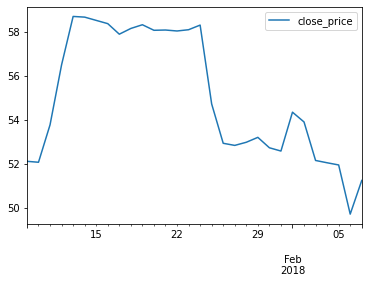

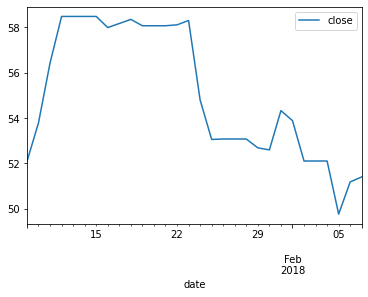

In [37]:
predictions.plot(legend=True)
test.plot(legend=True)

In [38]:
test['close'].mean()

55.01233333333332

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['close'].mean()
rmse=sqrt(mean_squared_error(pred,test['close']))
print(rmse)

4.280906831887774


In [ ]:
# model2=ARIMA(df['close'],order=(1,0,5))
# model2=model2.fit()
# df.tail()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


For Future Prices (predicting for next 30 days)

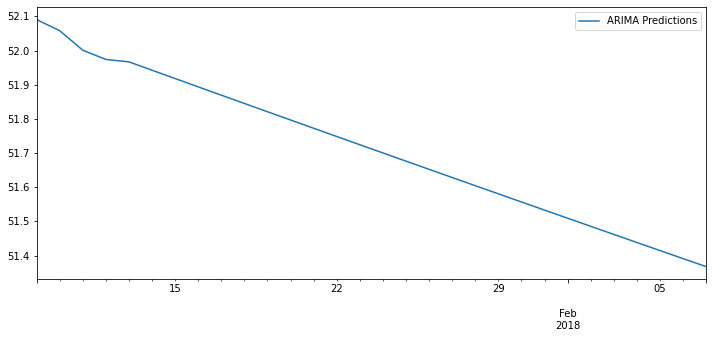

In [41]:
pred.plot(figsize=(12,5),legend=True)

# Residual Error

                   0
count  619029.000000
mean       -0.000018
std         4.798985
min     -1841.246321
25%        -0.424665
50%        -0.004491
75%         0.466873
max       661.331342


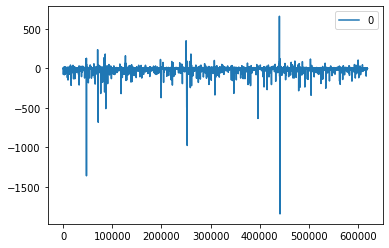

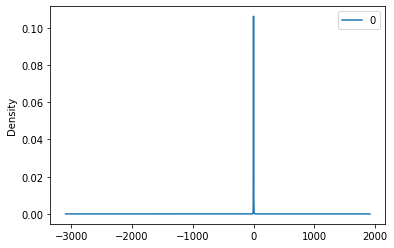

In [ ]:
# plot residual errors
residuals = pd.DataFrame(model2.resid)
residuals.plot()
# pyplot.show()
residuals.plot(kind='kde')
# pyplot.show()
print(residuals.describe())